<a href="https://colab.research.google.com/github/sobyeol/BigData/blob/master/%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98_%EB%8F%99%EB%B3%84(%EC%97%B0%EB%A0%B9%EB%8C%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/dataset/softmax_age.csv'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
np.random.seed(3)
tf.random.set_seed(3)

In [ ]:
df = pd.read_csv(filename, names = ["age","price","hospital","bus","air","convenience","subway","department","office_dong","office_gu","bigmart","kindergarten","library","park","school","bank","senior"], header=0) # Tell pandas to use the first row as the header

age               int64
price           float64
hospital        float64
bus             float64
air             float64
convenience     float64
subway          float64
department      float64
office_dong     float64
office_gu       float64
bigmart         float64
kindergarten    float64
library         float64
park            float64
school          float64
bank            float64
senior          float64
dtype: object


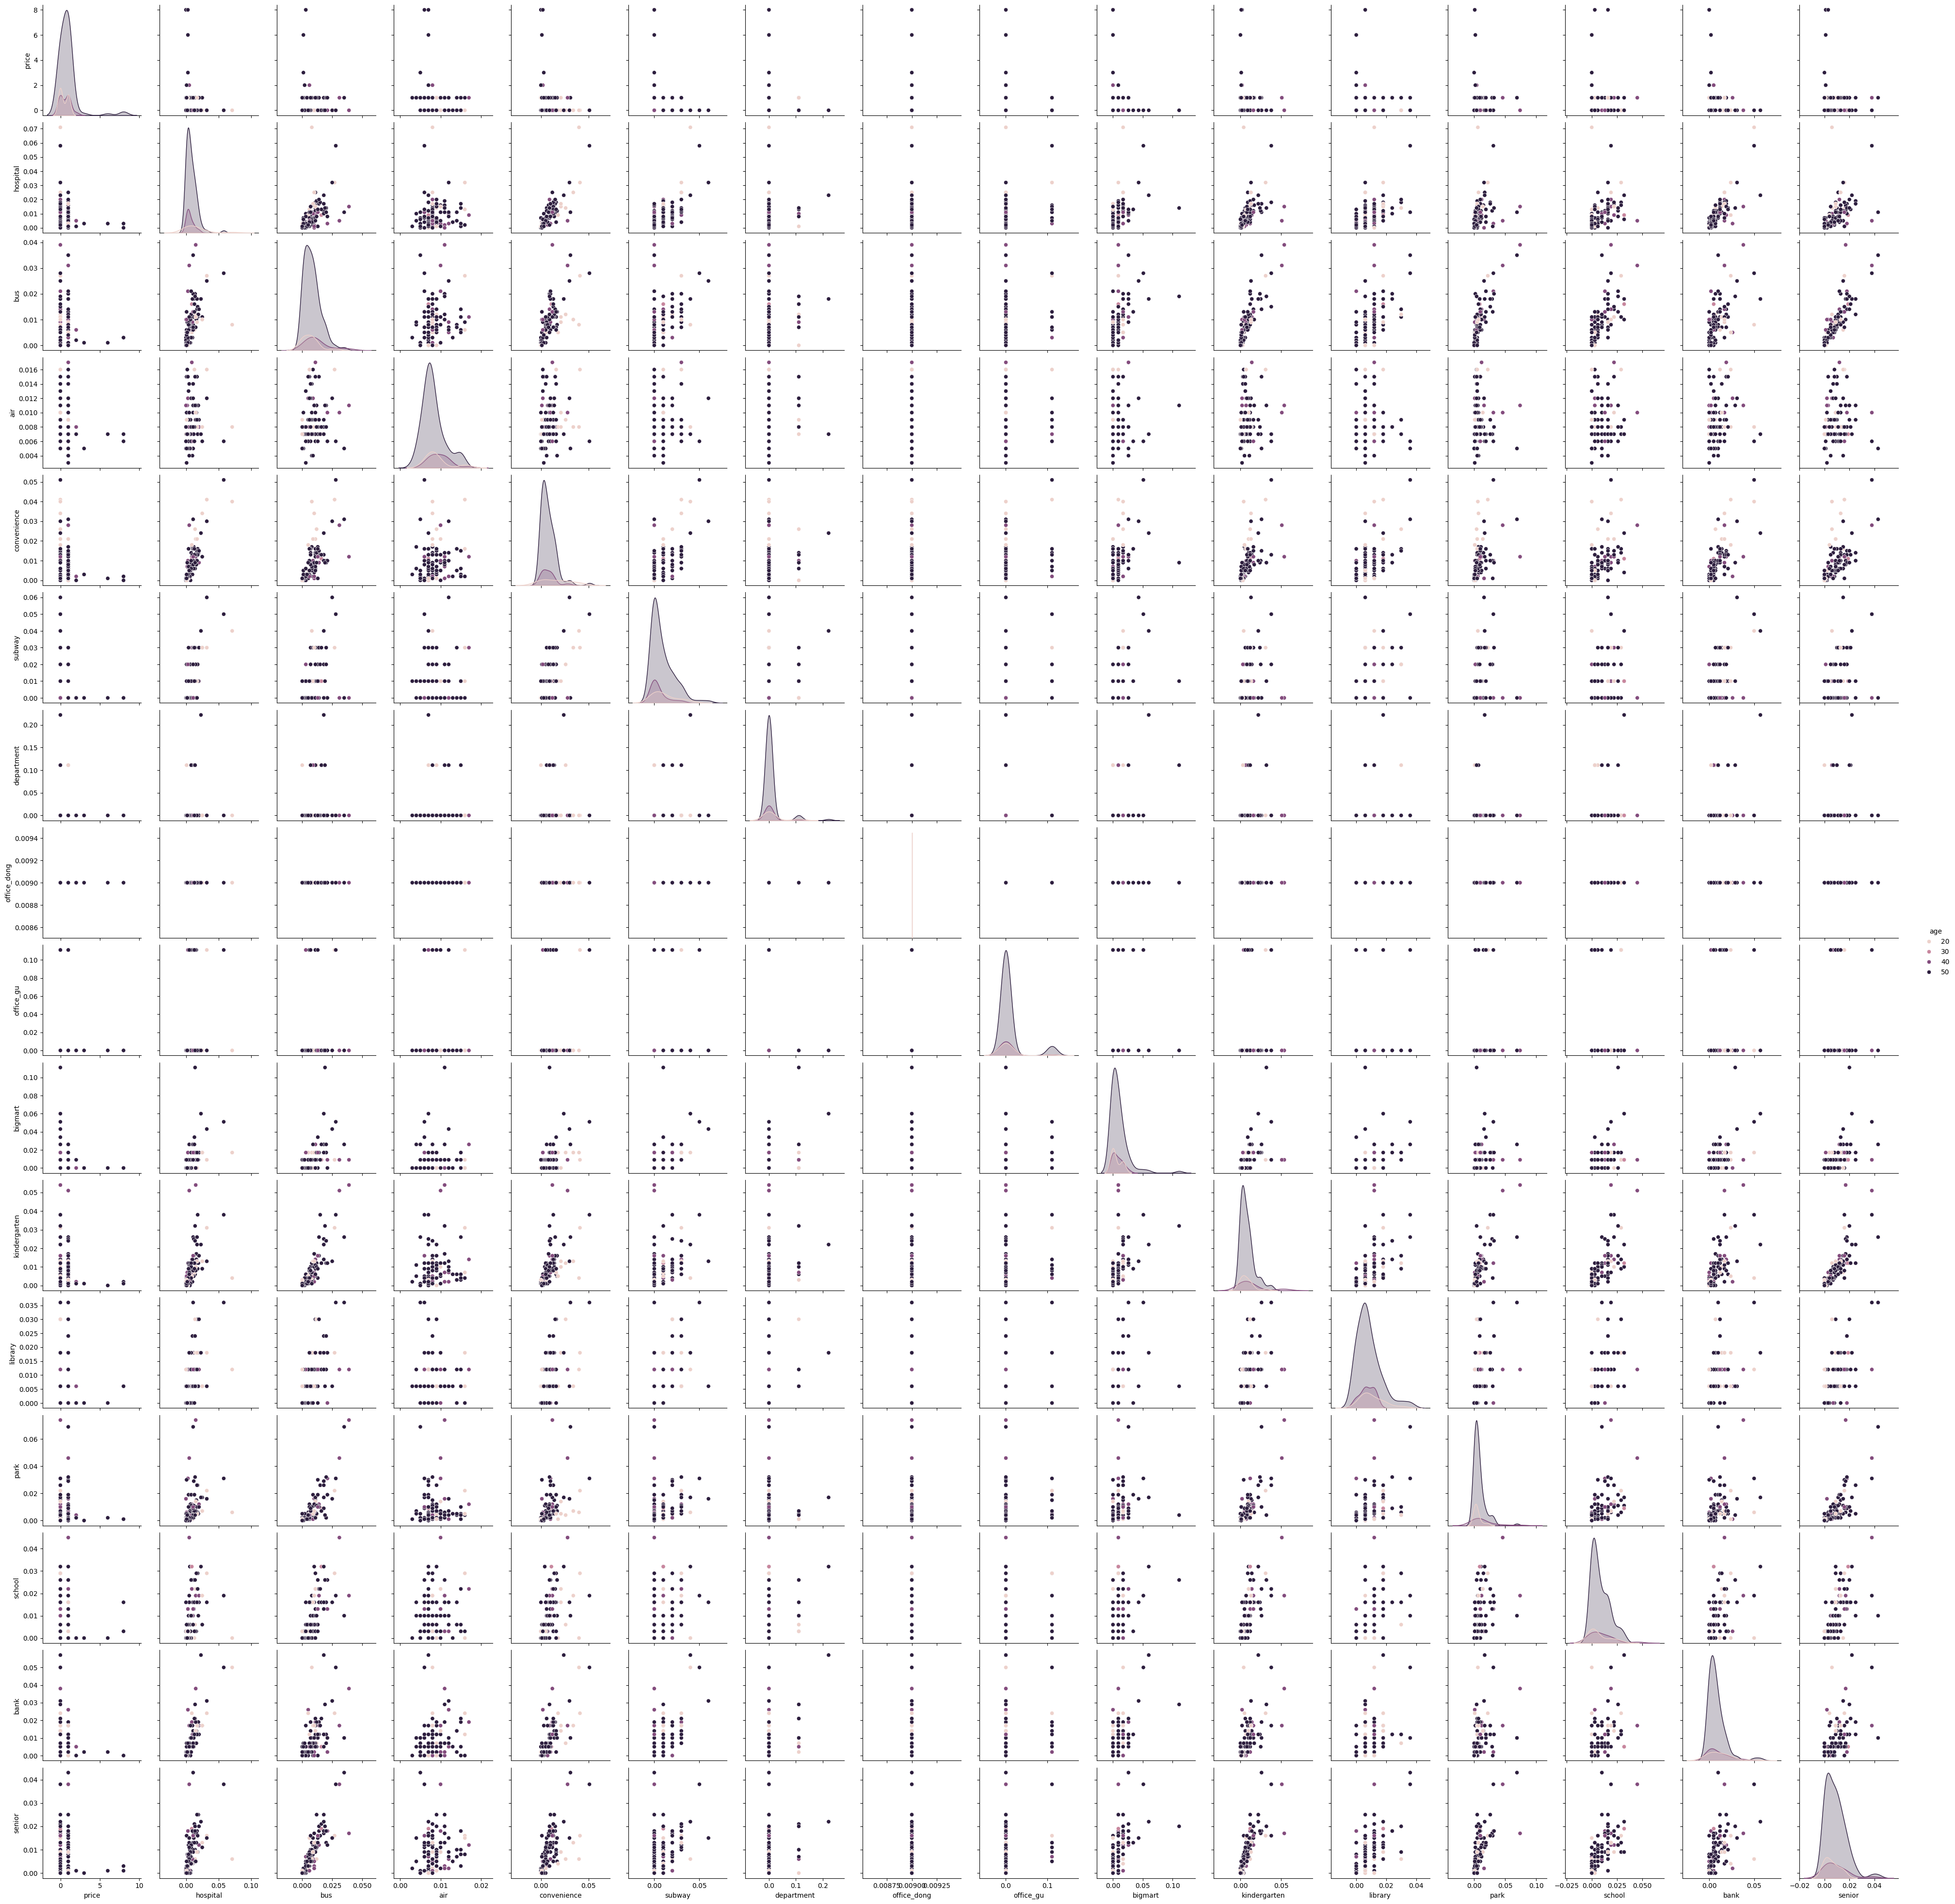

In [ ]:
# Check data types of your DataFrame
print(df.dtypes)

# Convert relevant columns to numeric types if needed
# Example: If 'price' is stored as strings, convert it to integers
df['price'] = df['price'].astype(int)

# Try the pairplot again
sns.pairplot(df, hue='age');
plt.show()

In [ ]:
dataset = df.values

In [ ]:
print(dataset)

[[4.0e+01 1.0e+00 3.0e-03 ... 3.0e-03 2.6e-02 2.0e-03]
 [4.0e+01 0.0e+00 1.5e-02 ... 1.9e-02 3.8e-02 1.7e-02]
 [4.0e+01 1.0e+00 2.0e-03 ... 3.0e-03 0.0e+00 3.0e-03]
 ...
 [4.0e+01 0.0e+00 1.1e-02 ... 1.3e-02 1.2e-02 1.6e-02]
 [5.0e+01 0.0e+00 1.4e-02 ... 2.6e-02 2.9e-02 2.0e-02]
 [5.0e+01 0.0e+00 1.3e-02 ... 3.0e-03 1.2e-02 1.3e-02]]


In [ ]:
X = dataset[:,0:13]
print(X.dtype)
Y_obj = dataset[:,0]
print(Y_obj) # Print the array Y directly

float64
[40. 40. 40. 40. 50. 50. 50. 50. 50. 20. 50. 50. 40. 40. 50. 50. 20. 40.
 50. 50. 50. 50. 50. 50. 50. 40. 40. 50. 50. 40. 50. 50. 50. 50. 50. 50.
 50. 50. 20. 50. 20. 20. 50. 30. 50. 50. 50. 50. 50. 50. 20. 50. 50. 50.
 50. 50. 50. 50. 50. 40. 50. 50. 50. 50. 20. 50. 50. 20. 50. 20. 40. 40.
 50. 40. 50. 50. 50. 50. 20. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 20. 20. 50. 50. 20. 20. 50. 50. 50.
 50. 50. 50. 50. 50. 40. 50. 50.]


In [ ]:
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
print(Y.dtype)
print(Y)

int64
[2 2 2 2 3 3 3 3 3 0 3 3 2 2 3 3 0 2 3 3 3 3 3 3 3 2 2 3 3 2 3 3 3 3 3 3 3
 3 0 3 0 0 3 1 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 2 3 3 3 3 0 3 3 0 3 0 2 2 3 2
 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 0 0 3 3 3 3 3 3
 3 3 2 3 3]


In [ ]:
Y_encoded = tf.keras.utils.to_categorical(Y)
print(Y_encoded)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0.

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim = 13, activation = 'relu')) # Change input_dim to 13 to match X
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.fit(X, Y_encoded, epochs = 50, batch_size = 1)

Epoch 1/50
116/116 [==============================] - 1s 2ms/step - loss: 3.4294 - accuracy: 0.4052
Epoch 2/50
116/116 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.7414
Epoch 3/50
116/116 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.7414
Epoch 4/50
116/116 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.7414
Epoch 5/50
116/116 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.7414
Epoch 6/50
116/116 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.7414
Epoch 7/50
116/116 [==============================] - 0s 3ms/step - loss: 0.6255 - accuracy: 0.7414
Epoch 8/50
116/116 [==============================] - 0s 3ms/step - loss: 0.6322 - accuracy: 0.7414
Epoch 9/50
116/116 [==============================] - 1s 5ms/step - loss: 0.6171 - accuracy: 0.7414
Epoch 10/50
116/116 [==============================] - 1s 5ms/step - loss: 0.6177 - accuracy: 0.7414

In [ ]:
history = model.fit(X, Y_encoded, epochs = 50, batch_size = 1)


Epoch 1/50
116/116 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.9052
Epoch 2/50
116/116 [==============================] - 0s 2ms/step - loss: 0.2192 - accuracy: 0.8966
Epoch 3/50
116/116 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9052
Epoch 4/50
116/116 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.8966
Epoch 5/50
116/116 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9224
Epoch 6/50
116/116 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.8879
Epoch 7/50
116/116 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9224
Epoch 8/50
116/116 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9052
Epoch 9/50
116/116 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9138
Epoch 10/50
116/116 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9138

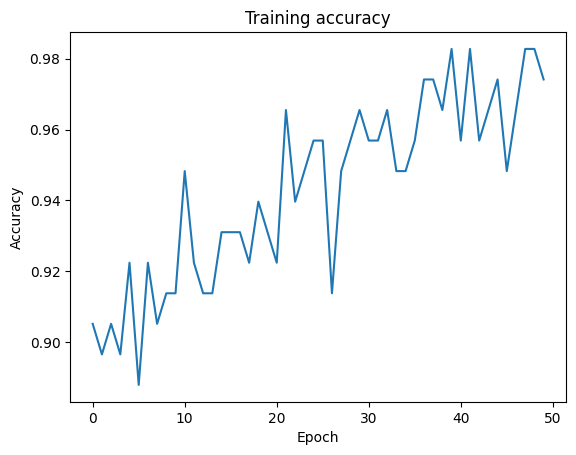

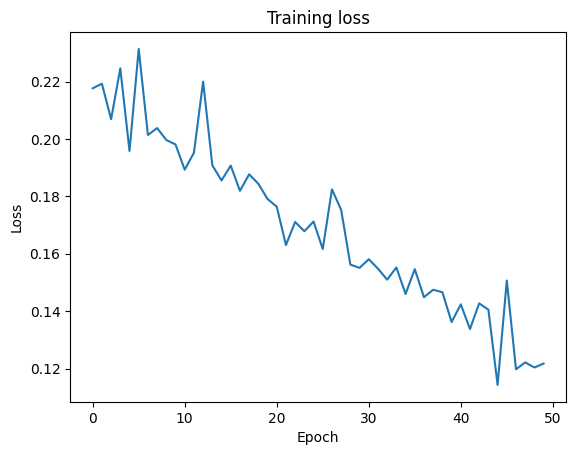

In [ ]:
import matplotlib.pyplot as plt
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다.
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(history.history['loss'])
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
import numpy as np

test_predict = [1.152, 0.003, 0.005, 0.012, 0.002, 0, 0, 0.009, 0, 0, 0.002, 0.006, 0.001, 0.003, 0.026, 0.002]
test_predict50 = [1.528,0.003,0.005,0.009,0.003,0.01,0,0.009,0,0.009,0.004,0,0.006,0.003,0,0.003]
test_predict40 = [0.152,1.003,0.005,0.012,0.002,0,0,0.009,0,0,0.002,0.006,0.001,0.003,0.026,0.002]
# Remove the unnecessary elements to match the expected input shape (13 features)
test_predict = np.array(test_predict[:13]).reshape(1, -1)
test_predict50 = np.array(test_predict50[:13]).reshape(1, -1)
test_predict40 = np.array(test_predict40[:13]).reshape(1, -1)
print(model.predict(test_predict))
print(model.predict(test_predict50))
print(model.predict(test_predict40))

1/1 [==============================] - 0s 110ms/step
[[9.9994743e-01 1.3920757e-06 5.1138155e-05 3.9474439e-12]]
1/1 [==============================] - 0s 62ms/step
[[9.9994731e-01 1.3945511e-06 5.1275521e-05 4.1583716e-12]]
1/1 [==============================] - 0s 22ms/step
[[9.9997723e-01 6.0100643e-07 2.2229629e-05 1.6769443e-12]]
